# Introduction to Neural Networks

In this notebook, the performance of simple neural network architectures featuring different choices of hyperparameters is demonstrated. This showcases the influence of these hyperparameters on the performance of the neural networks, helping to build intuition. Additionally, a demonstration of constructing such neural networks in PyTorch is provided.

In [37]:
import os
import torch
import torch.nn as nn
import numpy as np
import torchvision
from Models import FCNN, CNN
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

### The Data: MNIST

The neural network models will be trained on the MNIST dataset, which consists of handwritten digits ranging from 0 to 9. The goal of the neural networks is to correctly classify these digits into their respective classes (0-9). Below is a random demonstration of a sample from the dataset:

Text(0.5, 0.98, 'Samples of Digits')

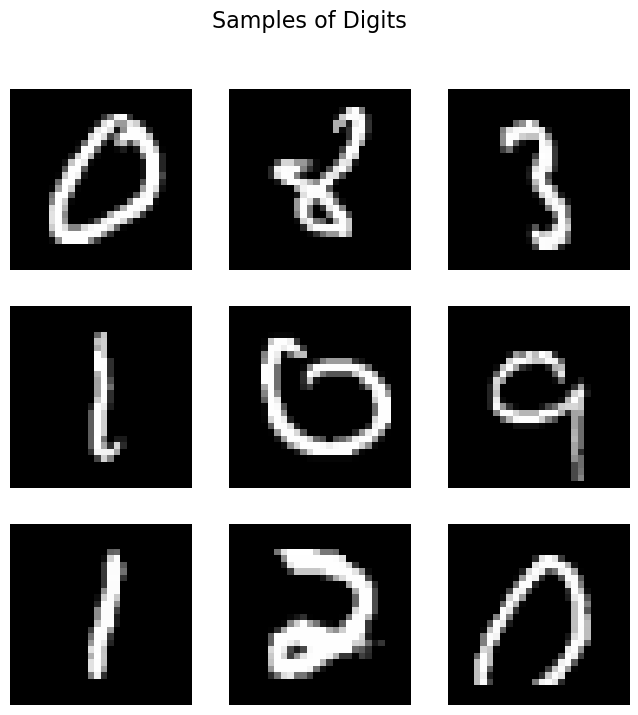

In [36]:
# Load the train and the test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform=transforms.ToTensor())

# Create a figure of samples of the traindataset
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# Loop over each subplot and plot some data
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        random_number = np.random.randint(0, 60000)
        ax.imshow(train_dataset[random_number][0].permute(1,2,0), cmap='gray')
        ax.axis('off')
        
fig.suptitle('Samples of Digits', fontsize=16)

### The Fully Connected Neural Networks

In this section, the performance of several fully connected neural networks trained on the MNIST dataset is evaluated. Each data sample in the MNIST dataset is a 28x28 black and white image of a handwritten digit, represented as a 28x28 dimensional tensor. This tensor is then transformed into a 784-dimensional vector (since 28*28=784), which serves as the input to the fully connected neural network.

In [42]:
# Define the models and load their parameters
# Specify the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# The first FCNN model
hidden_layers_FCNN_1 = [100,100]
FCNN_1 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_1.to(device)

# The second FCNN model
hidden_layers_FCNN_2 = [100, 100, 100]
FCNN_2 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_2.to(device)

# The third FCNN model
hidden_layers_FCNN_3 = [150, 150]
FCNN_3 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_3.to(device)

# The fourth FCNN model
hidden_layers_FCNN_4 = [150, 150, 150]
FCNN_4 = FCNN(28*28, hidden_layers_FCNN_1, 10)
FCNN_4.to(device)

# Combine all the FCNN models in a list
FCNN_Models = [FCNN_1, FCNN_2, FCNN_3, FCNN_4]

# Load the parameters for all the models with learning rate 0.01
for model in FCNN_Models:
    model_path = f"./FCNN_Model_Parameters/{str(model).split('(')[0]}_{FCNN_Models.index(model)}_lr_0.01"       # A directory for the model parameters    
    model.load_state_dict(torch.load(model_path))

#### The Losses of the Fully Connected Neural Networks

The following plots display the loss curves of several fully connected neural networks trained on the standard MNIST dataset. The subplot titles specify the model architectures as a list, with each entry representing the number of nodes in the hidden layers.

In [77]:
# Define a list to collect all the losses of the pretrained FCNN models 
models_losses = []

# Specify the directory of the saved model losses
loss_list_dir = os.listdir("./FCNN_Model_Loss")

# Load all the model losses in the list
for i in range(len(loss_list_dir)):
    current_dir = "./FCNN_Model_Loss/" + loss_list_dir[i]
    current_model_loss = []
    if i % 5 == 0:
        if i > 0:
            models_losses.append(current_model_loss_list)
        current_model_loss_list = []
    with open(current_dir, "r") as f:
        for line in f:
            current_model_loss.append(float(line))
    current_model_loss_list.append(current_model_loss)    
models_losses.append(current_model_loss_list)

# Specify the used learning rates
learning_rates = [(i)/100 for i in range(1,10,2)]

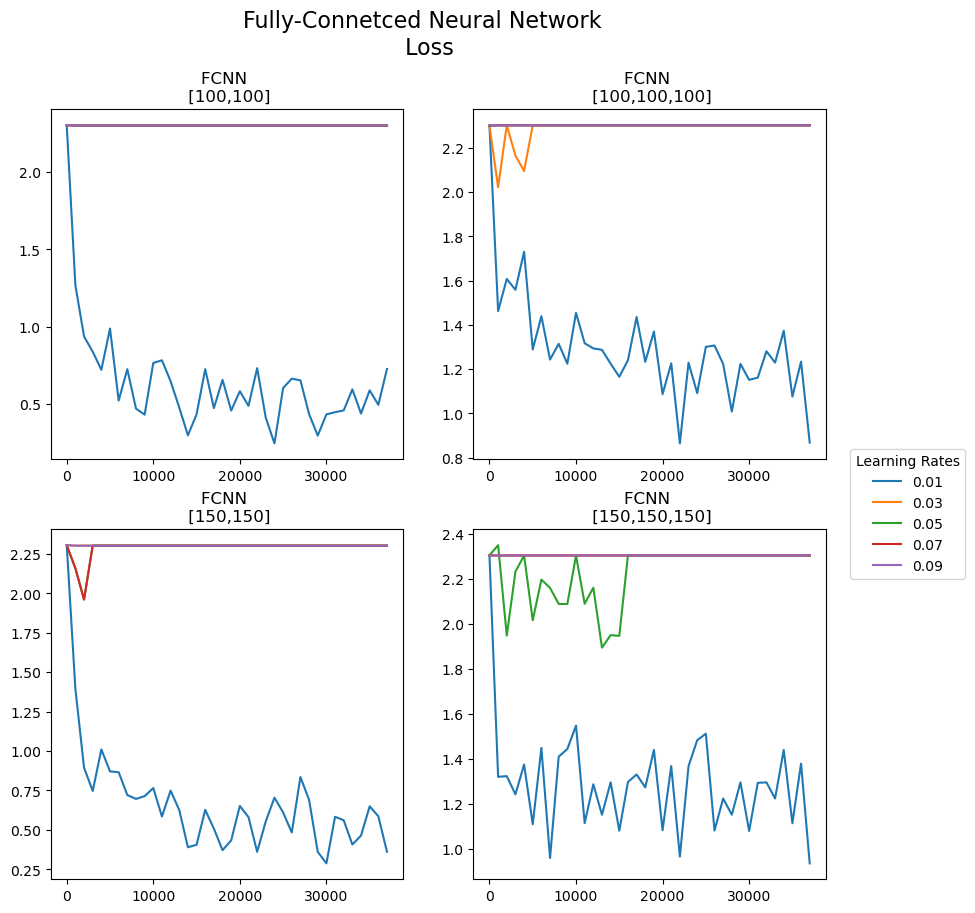

In [81]:
# Create a figure with 4 subplots displaying the training loss curves
fig, axs = plt.subplots(2,2,figsize=(10,10))

# Add the general title
fig.suptitle("Fully-Connetced Neural Network \n Loss", fontsize=16)

# Titles for each subplot with the list representing the number of nodes in each hidden layer
titles = ["FCNN \n [100,100]", "FCNN \n [100,100,100]", "FCNN \n [150,150]", "FCNN \n [150,150,150]"]

for i in range(4):
    # Choose the subplot
    ax = axs[i//2, i%2]
    ax.set_title(titles[i])
    # Add the loss curves of the models
    for j in range(len(models_losses[i])):
        ax.plot([k for k in range(0,len(models_losses[i][j])) if k % 1000 == 0], [models_losses[i][j][k] for k in range(len(models_losses[i][j])) if k % 1000 == 0],  label=learning_rates[j])
plt.legend( title="Learning Rates", loc="upper left", bbox_to_anchor=(1.05, 1.25))

It is noteworthy that only the model architectures trained with a learning rate of 0.01 exhibit a decreasing loss curve, indicating successful training progress. Conversely, for all other learning rates, it appears that the model parameters become trapped in a local minimum from which they cannot escape.

#### The Accuracy of the Fully Connected Neural Networks

The subsequent plots illustrate the accuracy of predictions made by the fully connected neural networks on the MNIST test dataset. This dataset comprises images that were not utilized during the training phase.

In [83]:
# Define a list to collect all the test accuarcies of the pretrained FCNN models 
models_accuracies = []

# Specify the directory of the saved accuracies
accuracy_list_dir = os.listdir("./FCNN_Model_Accuracy")

# Load all the model accuracies in the list
for i in range(len(accuracy_list_dir)):
    current_dir = "./FCNN_Model_Accuracy/" + accuracy_list_dir[i]
    current_model_accuracy = []
    if i % 5 == 0:
        if i > 0:
            models_accuracies.append(current_model_accuracy_list)
        current_model_accuracy_list = []
    with open(current_dir, "r") as f:
        for line in f:
            current_model_accuracy.append(float(line))
    current_model_accuracy_list.append(current_model_accuracy)    
models_accuracies.append(current_model_accuracy_list)

# Specify the used learning rates
learning_rates = [(i)/100 for i in range(1,10,2)]

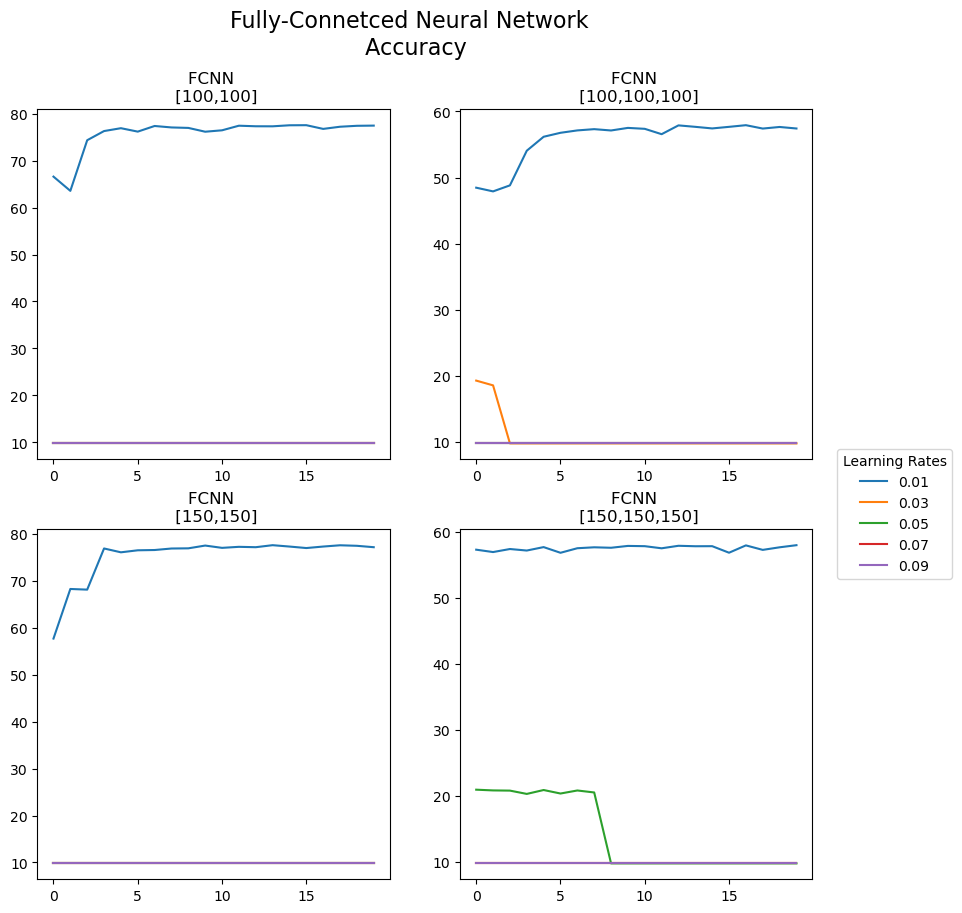

In [86]:
# Create a figure with 4 subplots displaying the test accuracy
fig, axs = plt.subplots(2,2,figsize=(10,10))

# Add the general title
fig.suptitle("Fully-Connetced Neural Network \n Accuracy", fontsize=16)

# Titles for each subplot with the list representing the number of nodes in each hidden layer
titles = ["FCNN \n [100,100]", "FCNN \n [100,100,100]", "FCNN \n [150,150]", "FCNN \n [150,150,150]"]

for i in range(4):
    # Choose the subplot
    ax = axs[i//2, i%2]
    ax.set_title(titles[i])
    # Add the accuracy curves of the models
    for j in range(len(models_accuracies[i])):
        ax.plot([k for k in range(0,len(models_accuracies[i][j]))], models_accuracies[i][j],  label=learning_rates[j])
plt.legend( title="Learning Rates", loc="upper left", bbox_to_anchor=(1.05, 1.25))

#### Demo of the Fully Connected Neural Network Models